# Detroit Open Demolitions 
### Public X Design Workshop, Detroit, Sep, 2018 
#### We are Avigail Vantu (avigailvantu@gmail.com) & Eitan Akman (eitanakman@gmail.com), we are both cities, tech and data enthusiastic based in Brookyln, NY and are very excited to be visting Detroit. 

# ****EA link to notebooks + explaining bugs and scenarios along the lab**** 

Hey there! Welcome to our workshop! 

All are welcome, and there are no prerequisiten needed to participate. Today we want to use data to better understand Detroit's demolitions policies. All of the data we will be working on in these session is released as open data - meaning it is accessible online for everyone to use. In particular, Detroit's Open Data Portal was used in this notebook descriptives and analysis: https://data.detroitmi.gov/ 

### Agenda: 
    1. Introduction: Workshop Objectives & Intro to Open data  / databases , Jupyter, and Python
    2. Demolitions Data
    3. Short term impact
        a. 311 data
    4. Long Term Impact
        a. Crime
        b. Real estate
    5. Conclusions / discussion 
    

## 1. Intro

### a. Workshop Objectives: 

### Here's a map of the Demolitions in Detroit colored by Neighborhood  - we will be diving deep into this data very soon.  We'll munge data, visualize and plot the data. 


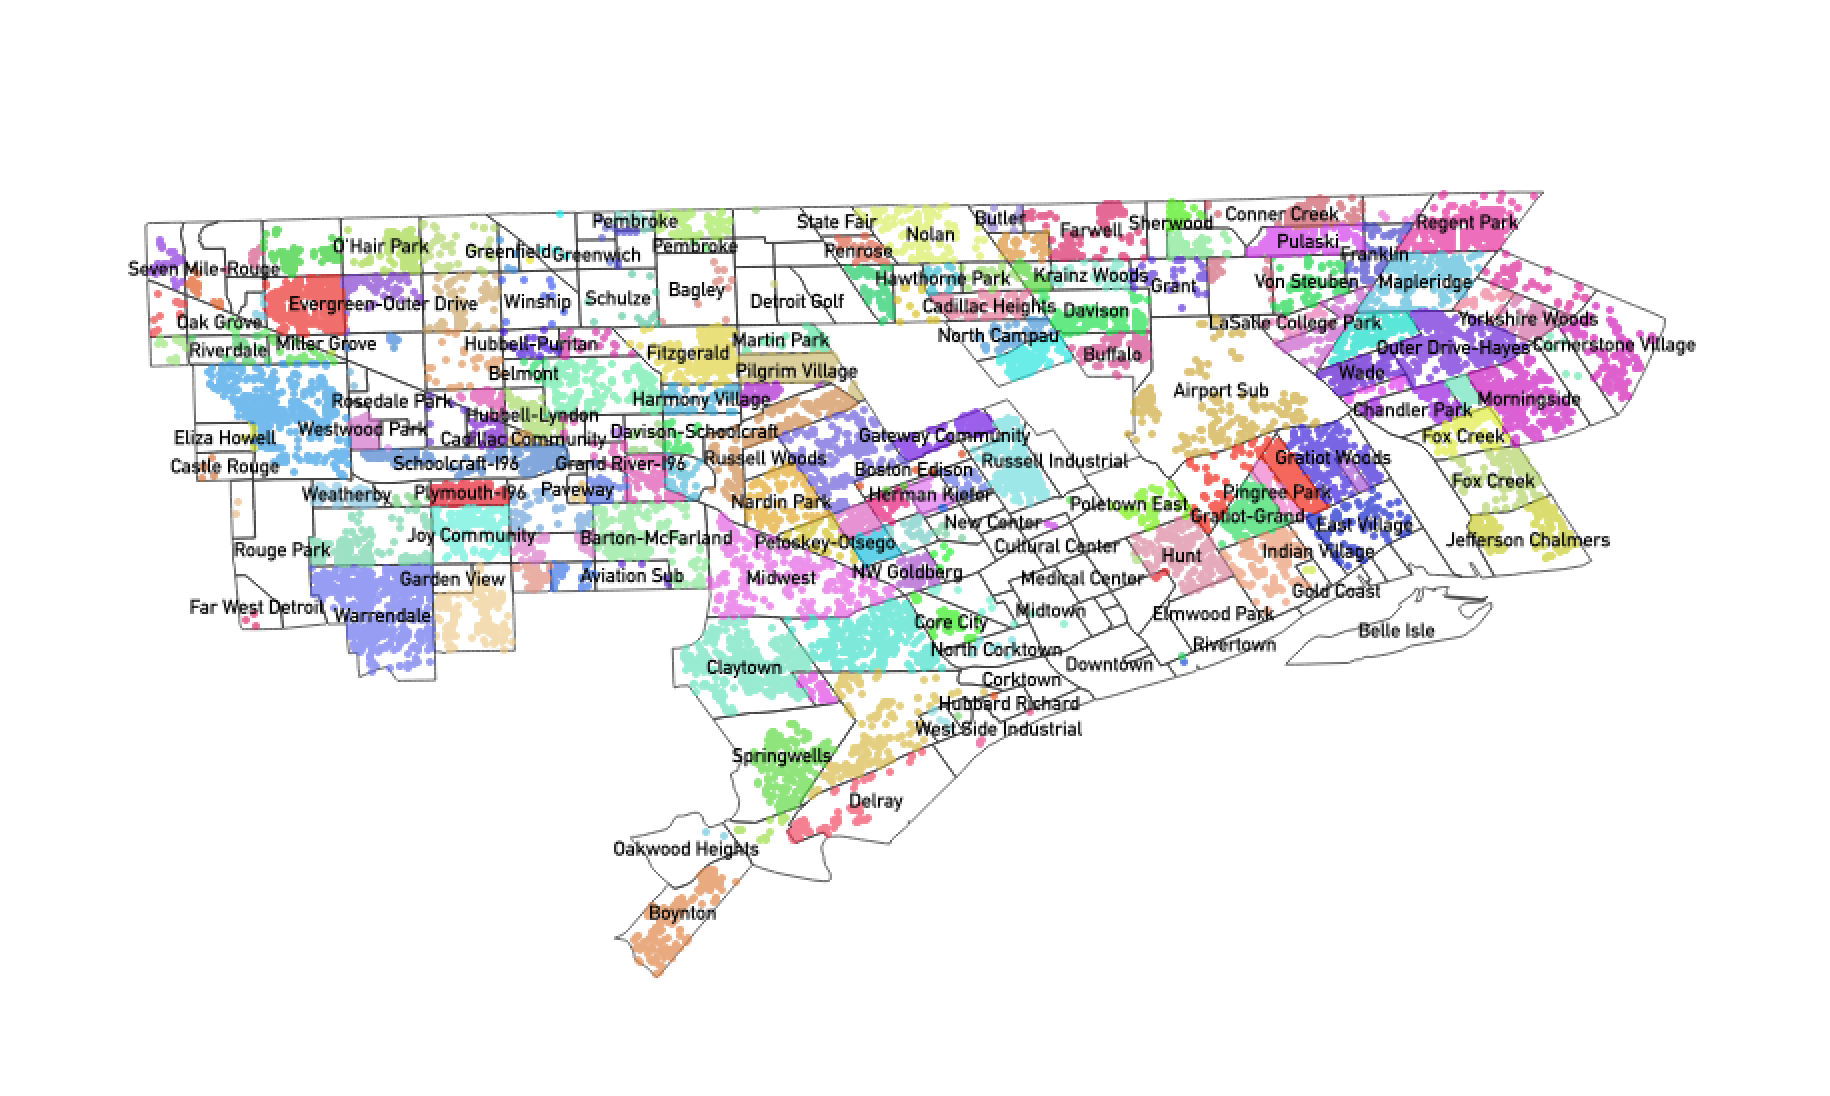

In [1]:
from IPython.display import Image
Image(filename='TotalDemoPerNighDetroit.png')


### b. Tutorials

###  But first thing first -- let's go through some core functionalities about Python Jupyter notebooks.

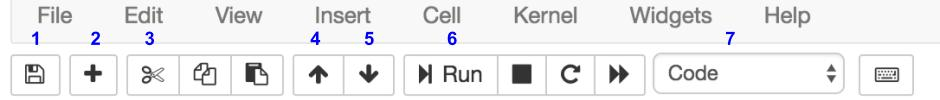

In [2]:

Image(filename='jupyter_menu.jpg')
 

### To simplify things here's a copy of the upper menu you all see in your Jupyter notebooks and it is numbered 1-7. 

- 1 simply saves your work similiar to other types of docs
- 2 is used in order to add a new IN cell 
- If you make a mistake or just don't need a specific cell anymore, press 3 to crop it. Carfeull not clicking it by accident when trying to add a cell..  
- 4 shifts the chosen cell one spot higher in your notebook and 5 does the same but toward down 
- 6 is used to run the chosen cell, this will genenrate the cell's output 
- 7 is used to change a cell's funcilnality, the two main ones we will use today is: code (defeault) and Markdown which is mainly used to write comments and titels.

#### More useful things: 

- if the notebook is stuck, or if you want to restart it - go to 'Kernel' and click - 'Restart'
- if you only want to run parts of the notebook - go to 'Cell' and choose the most suitable options: (Run All, Run All Above and Run All Bellow are some of the popular ones).
- To save a copy of your work, go to File - Download As : we recommend HTML or IPYNB to restore with viz
- To run a cell using only the keyboard press shift-return at the same time. 

#### Now, let's practice some of what we've learned: 

Please create 3 new cells

1. In the first cell: 

print ("Hello Detroit, I'm *your name* !" )

2. in the second cell: 
Sum up your birthday digits (month + day + year) 
Hint: write an equation using plus sings and exlcuding the = sign 

3. Define variable of your choice (* = number / equation) and then: print (the variable)


In [3]:
# <your code>

#### Great! 

Now change the order of the cells so that instead of 1,2,3 they are ordered 3,1,2. Got it? 

If you want to expend your Jupyter and Pandas in psrtcular knowldge we recommend strating with :http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html

### Coding tools, packages and languages: 
Today we will be using Python and in particular Pandas and Geopandas as toolf of data manipulation, cleaning, merging, visualzation, plotting and many more fanctionalitites that make working with big spreadhsheets easier. 

Let's import the packages we need:

In [4]:
#import packages

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


## 3.  Demolitions 

### Read datasets
We will be loading CSV files, which are similiar to spreadsheets and, and GeoJson which is a geographical data format mainly used to represen points and polygons.  

First let's load the demolitions data which is downloaded from the Detroit open data portal in a CSV format, Pandas will trasnform it into a DataFrame, which is a two-dimensional format ( bascially columns and rows). Values can be numeric, string, boolean etc.

In [5]:
#load Demolitions data 
demolitions = pd.read_csv('Detroit_Demolitions.csv')

In [6]:
demolitions.Neighborhood.unique()

array(['Delray', 'Claytown', 'Chadsey Condon', 'Conant Gardens',
       'Boynton', 'Airport Sub', 'Grant', 'Nortown', 'Cadillac Community',
       'Riverbend', 'Mapleridge', 'Petoskey-Otsego', 'Morningside',
       'Gateway Community', 'North Rosedale Park', 'Fitzgerald/Marygrove',
       'Holcomb Community', 'North End', 'Herman Kiefer', 'Nolan',
       'Grixdale Farms', 'Campau/Banglatown', 'Penrose',
       'Cadillac Heights', 'McDougall-Hunt', 'Oakman Blvd Community',
       'Pilgrim Village', 'Dexter-Linwood', 'Chalfonte',
       'Schoolcraft Southfield', 'Central Southwest',
       'Gratiot Town/Ketterring', 'Poletown East', 'Midwest', 'Davison',
       'Springwells', 'Franklin Park', 'Old Redford', 'Five Points',
       'Joy Community', 'Greenfield', 'We Care Community', 'Franklin',
       'Regent Park', 'Brightmoor', 'Chandler Park-Chalmers', 'Fiskhorn',
       'Warren Ave Community', 'Evergreen-Outer Drive', 'Paveway',
       'Westwood Park', 'Chandler Park', 'Pulaski', 'Yorks

Demolitions

In [7]:
#how many demolitions over the years 2014-2018
print ("The total number of demolitions is:",len(demolitions))

The total number of demolitions is: 14524


### Data Cleaning 

In [8]:
# remove NaN's  
demolitions = demolitions.dropna()

### Demolitions Cost 

In [9]:
print ("The total price of demolitions is $" + str(demolitions['Price'].sum() / 1000000)+"M")

The total price of demolitions is $228.31201243M


In [10]:
#group by neighborhoods to have the total price for demolitions for each
dem = demolitions.groupby(['Neighborhood']).sum()

### dem is a DF with USD spent on demolitions by neighborhood 

In [11]:
#let's see how does it looks like
dem.head(4)

,Price,Council_District,Latitude,Longitude
Neighborhood,,,,
Airport Sub,3942161.75,714,9242.481514,-18099.234705
Aviation Sub,64718.40,28,169.423262,-332.650528
Bagley,167511.00,20,424.264473,-831.466834
Barton-McFarland,3174172.63,1340,8133.953885,-15967.729907


This dataframe summs up all numerical columns (price, council district, Lat, Lon). However, except for price, all columns agragated this way actually have no meaning so they are noise we actually want to remove from the data. 
Let's do that:



In [12]:
# delete columns 

del dem['Council_District']
del dem['Latitude']
del dem['Longitude']


dem.head()

,Price
Neighborhood,
Airport Sub,3942161.75
Aviation Sub,64718.40
Bagley,167511.00
Barton-McFarland,3174172.63
Belmont,105975.52


Now that looks better, but let's try to better understand the cost of demolitions by neighborhood. Eyeballing the dataframe makes it a little hard to come up with meaningful conclusions..  
Ploting the data will make it easier to grasp. Let's do it 


In [13]:
# first thing first: in the group.by process the column we grouped on (i.e.  neighborhood) 
#colapses into the DataFrame index.
# to make it easiar to interact with let's create a new column which equals to the index (== Neighborhood)
dem['Neighborhood'] = dem.index

In [14]:
#let's see how it looks like: 
dem.head()

,Price,Neighborhood
Neighborhood,,
Airport Sub,3942161.75,Airport Sub
Aviation Sub,64718.40,Aviation Sub
Bagley,167511.00,Bagley
Barton-McFarland,3174172.63,Barton-McFarland
Belmont,105975.52,Belmont


Beautiful

In [15]:
# now let's sort the data so that the lowest priced neighborhood will apear first 
#dem = dem.sort_values(by='Price')

In [16]:
print ("four least demolitions funded neighborhoods in Detroit are:",dem.head(4))
print ("four most demolitions funded neighborhoods in Detroit are:",dem.tail(4))

four least demolitions funded neighborhoods in Detroit are:                        Price      Neighborhood
Neighborhood                                  
Airport Sub       3942161.75       Airport Sub
Aviation Sub        64718.40      Aviation Sub
Bagley             167511.00            Bagley
Barton-McFarland  3174172.63  Barton-McFarland
four most demolitions funded neighborhoods in Detroit are:                       Price     Neighborhood
Neighborhood                                
Wildemere Park   2006139.62   Wildemere Park
Winship           156360.45          Winship
Woodbridge        317551.00       Woodbridge
Yorkshire Woods  1301885.00  Yorkshire Woods


### Task I: 
Can you try and calculate the mean cost of demolitions per neighborhood? 

Hint: use dem as your dataframe, "Price" is the column which we want to get the mean of
* you may want to use this function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

In [17]:
# <your code> 



So we can see that more than 9 Million USD were spent on demolitions in the neoghborhood of Warrendale, and only 9,000 USD were sepent in Greenwich

## Number of Demolitions per Neighborhood

In [18]:
#Aggragate number of demolitions by neighborhood 

demolitionsnum = demolitions.groupby(['Neighborhood']).count()

In [19]:
# re organize DataFrame

demolitionsnum['Neighborhood'] = demolitionsnum.index
demolitionsnum['DemCount'] = demolitionsnum['Address']


In [20]:
# remove all columns but the relelvent ones
demolitionsnum = demolitionsnum[['Neighborhood','DemCount']]

In [21]:
#see how this looks like
demolitionsnum.head()

,Neighborhood,DemCount
Neighborhood,,
Airport Sub,Airport Sub,218
Aviation Sub,Aviation Sub,4
Bagley,Bagley,10
Barton-McFarland,Barton-McFarland,192
Belmont,Belmont,8


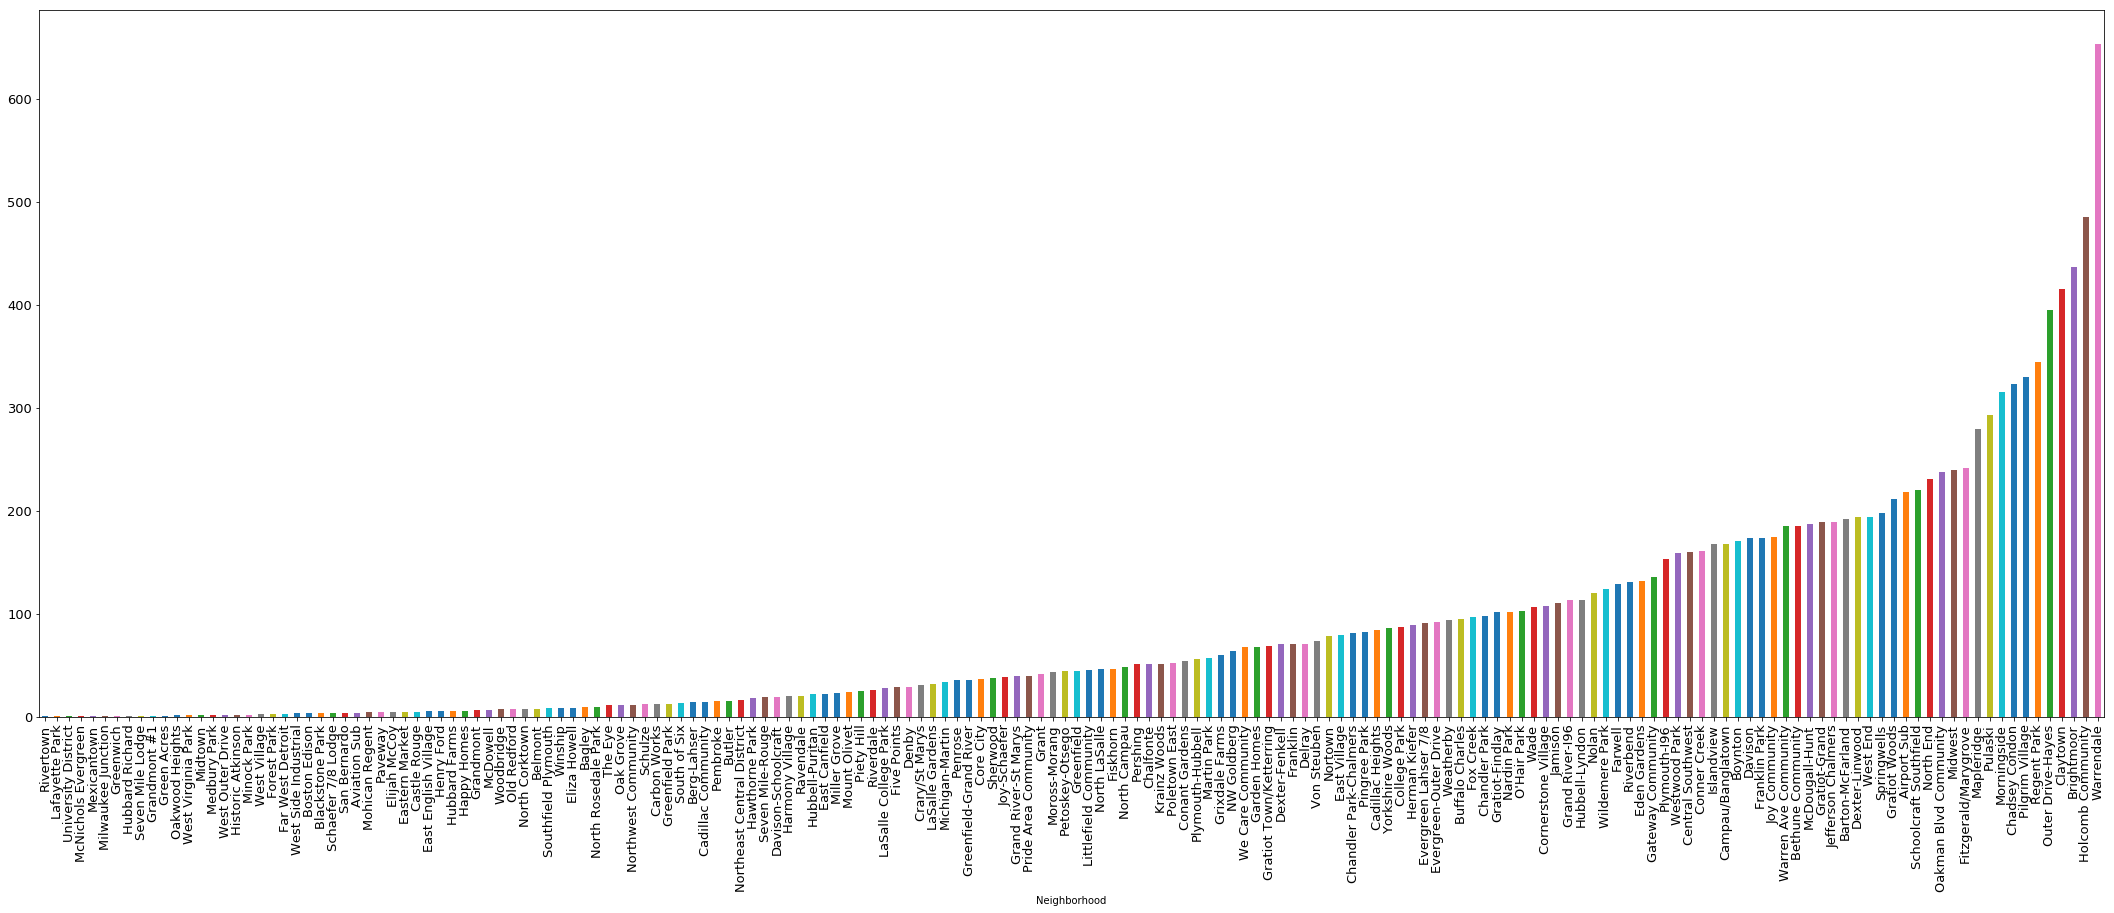

In [22]:
#Let's sort and plot demolitions by nieghborhood 

demolitionsnum = demolitionsnum.sort_values(by='DemCount')
plt.figure(figsize=(37,13))
demolitionsnum['DemCount'].plot.bar(stacked=False,fontsize=13)

plt.show()

Pretty cool but very tiny. 

In [24]:
#let's see how many neghbohoords do we actually have 
len(demolitionsnum)


172

let's try and plot the top 20% 

In [25]:
demolitionsnum = demolitionsnum.tail(34)

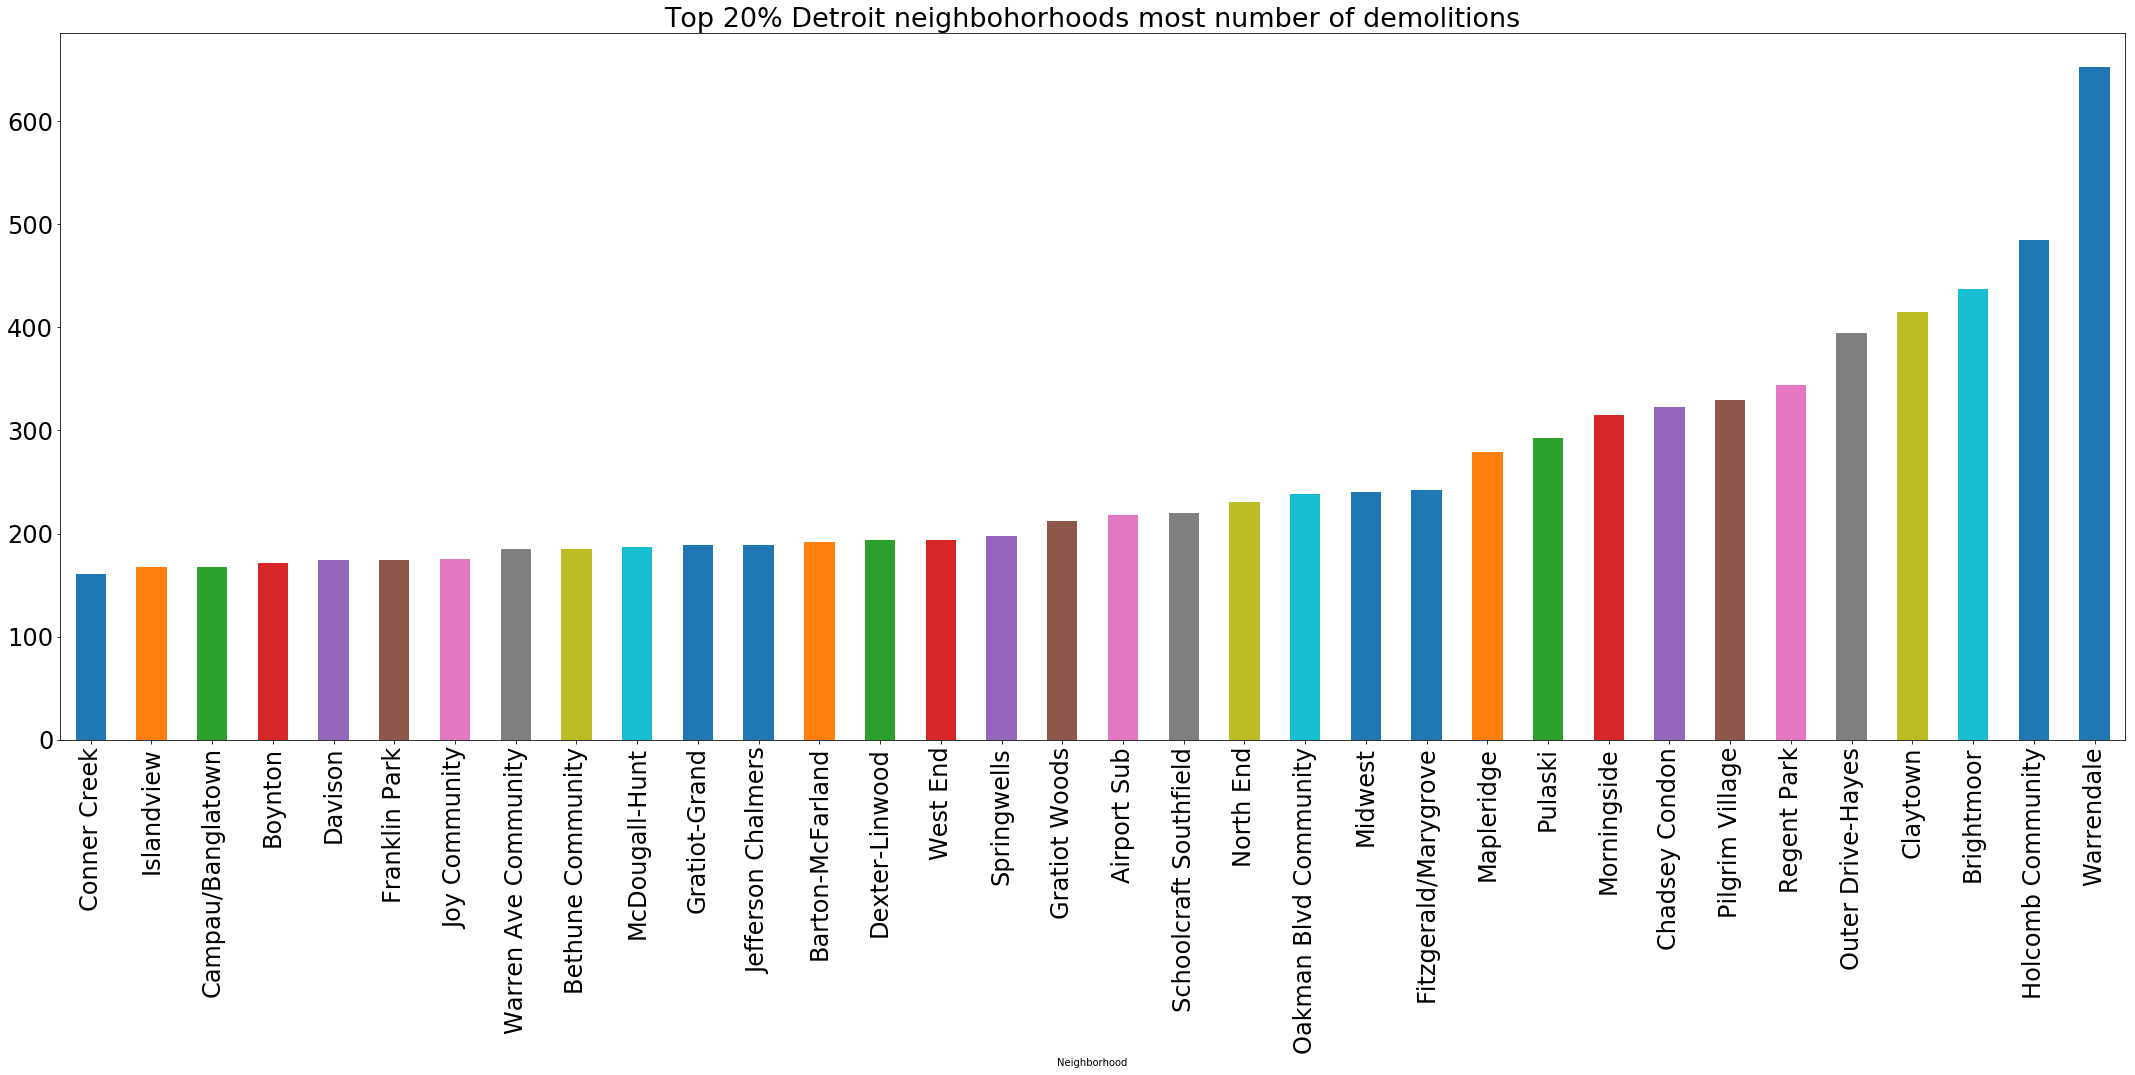

In [27]:

plt.figure(figsize=(37,13))
plt.title('Top 20% Detroit neighbohorhoods most number of demolitions',  fontsize=27)
demolitionsnum['DemCount'].plot.bar(stacked=False,fontsize=24)

#plt.figure(figsize=(37,13))
#plt.title('Top 20% Detroit neighbohorhoods most demolitions spending',  fontsize=27)
#dem['Price'].plot.bar(stacked=False, fontsize=24)

plt.show()

In [28]:
####### NORMALIZE

In [33]:
from shapely.geometry import Point

In [34]:
# Demolitions DF to GeoDF 

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(demolitions.Longitude, demolitions.Latitude)]
demolitions = demolitions.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}


In [35]:
#create a new DataFrame for the geo points 
gdf = gpd.GeoDataFrame(demolitions, crs=crs, geometry=geometry)

In [36]:
DetroitNeighborhoods = gpd.read_file('DetroitNeighborhoods.geojson')
DetroitNeighborhoods = DetroitNeighborhoods.to_crs({'init': 'epsg:4326'})

In [37]:
DetroitNeighborhoods.head()

,acres,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1,geometry
0,1086.49884204,31710328.0781,3,4,1,75,1,27277.0743136,Gratiot Woods,West End,103,1,31380.7300469,(POLYGON ((-82.9915246858219 42.38438953003659...
1,496.783595203,21639806.8475,1,4,2,25,2,18822.43192,Chandler Park,Chandler Park,105,2,18822.43192,(POLYGON ((-82.97584899959158 42.3893319996678...
2,1159.77563198,31188710.5449,1,4,3,60,3,30500.9332741,Fox Creek,Riverbend,100,3,22537.8470224,(POLYGON ((-82.96784188332737 42.3836942899373...
3,901.711919191,39278414.0858,2,4,4,97,4,25466.5795687,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.5795687,(POLYGON ((-82.95140600040769 42.3550279999058...
4,964.17407249,41999254.6002,1,4,5,123,5,26596.6920683,Morningside,Morningside,97,5,26596.6920683,(POLYGON ((-82.94664400037011 42.3874689998093...


In [38]:
DetroitNeighborhoods['Neighborhood'] = DetroitNeighborhoods['nhood_name']

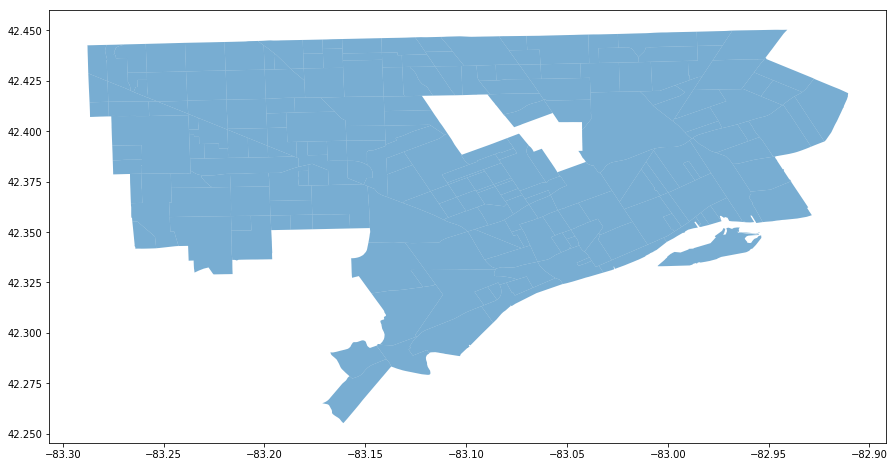

In [39]:
ax = DetroitNeighborhoods.plot(alpha=0.6,figsize = (15,16))
#f, ax = plt.subplots(1,figsize = (15,16))

plt.show()


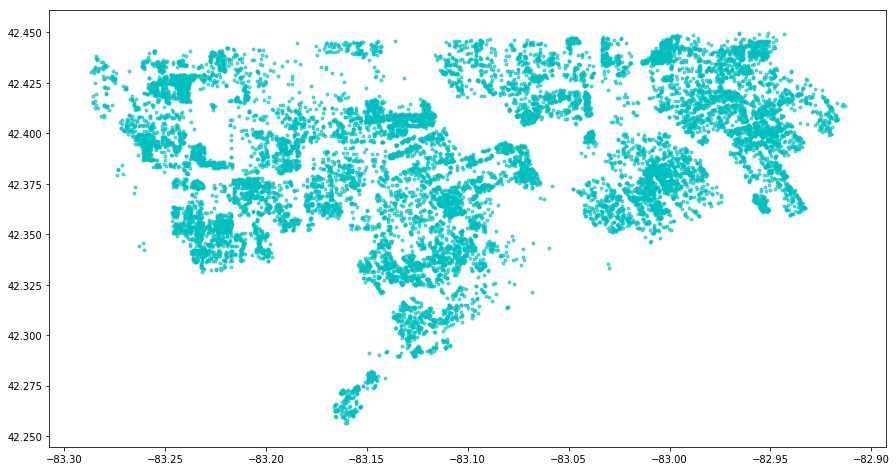

In [40]:

f, ax = plt.subplots(1,figsize = (15,16))
gdf.plot(c='c',marker='.',ax=ax, alpha=0.6)
plt.show()

## 4. Short term impact

??? 311 improve detroit demolitions related data

In [41]:
# <your code>

## 5. Long term impact

### a. Crime
We want to learn more about how Detroit's neighborhoods were influnced by the demolitions policy over time. As the policy was first intruduced in 2014 and are ongoing until now - 2018, we'd need to evaluate impact by comparing a specific varaible that might have been influnced in the period when the demolitions were conducted. 

Let's check out crime levels in Detroit's neighbohoods. We will use data from Detroit's open data portal for 2013 (to reflect crime levels just before the policy was introduced) and 2017 (the most recent full year). 

Since the crime incidents open datasets have changes in format over time and since our lab has time, and computation power limitations we have manipulated the 2013 and 2017 datasets ahead of time and combined them into one cleaned CSV file grouoped by neighborhood level. 

## ** If you are intrested to see the data cleaning process you can check out this repo  
https://github.com/avigailvantu/Detroit-prep

The raw data icludes All Crime Incidents for 2013 and 2017 and is available here: 

https://data.detroitmi.gov/browse?q=crime&sortBy=relevance

In [42]:
#Loading Crime Data
DetCrime = pd.read_csv('DetCrime13_17.csv')

#DetCrime13_17.csv

In [43]:
#let's clean duplicated column to avoid silly plotting
del DetCrime['Unnamed: 0'] 

In [44]:
DetCrime.head(4)

,Neighborhood,Incidents17,Incidents13
0,West End,352,693
1,Chandler Park,346,405
2,Riverbend,487,675
3,Jefferson Chalmers,468,654


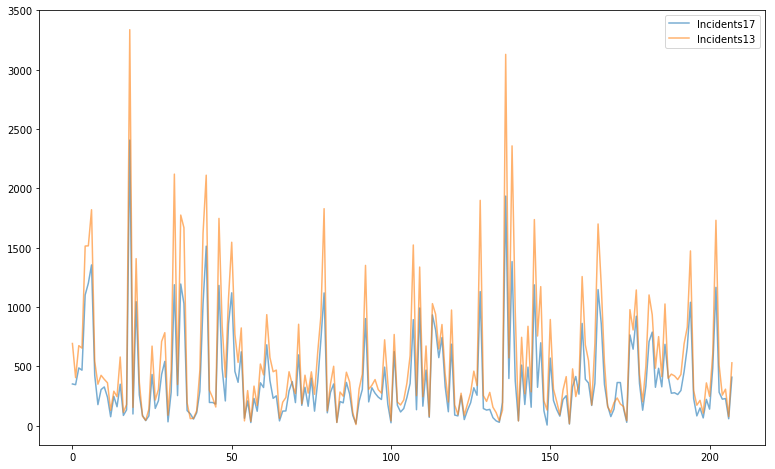

In [45]:
DetCrime.plot(alpha=0.6,figsize = (13,8))

Is this plot providing valauable infomration? , if not, can you think of a different way to use this infomration to derieve a better understanding about Detroit's crime level related to the demolitions data? 

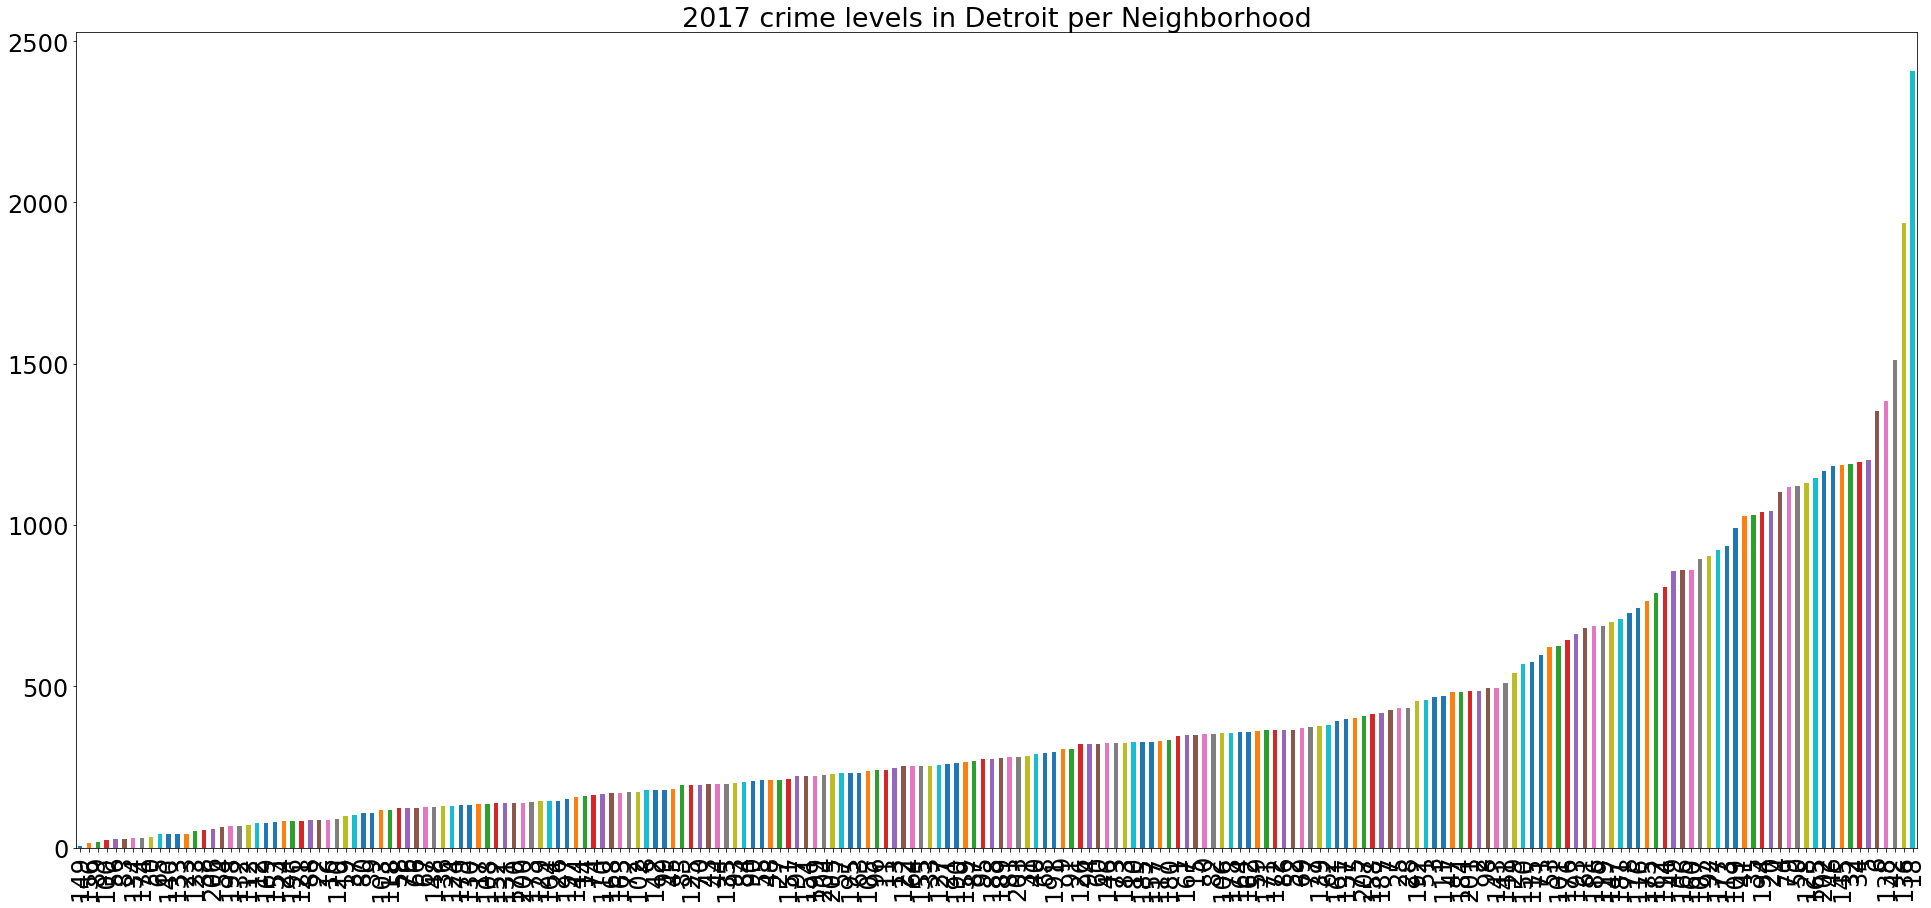

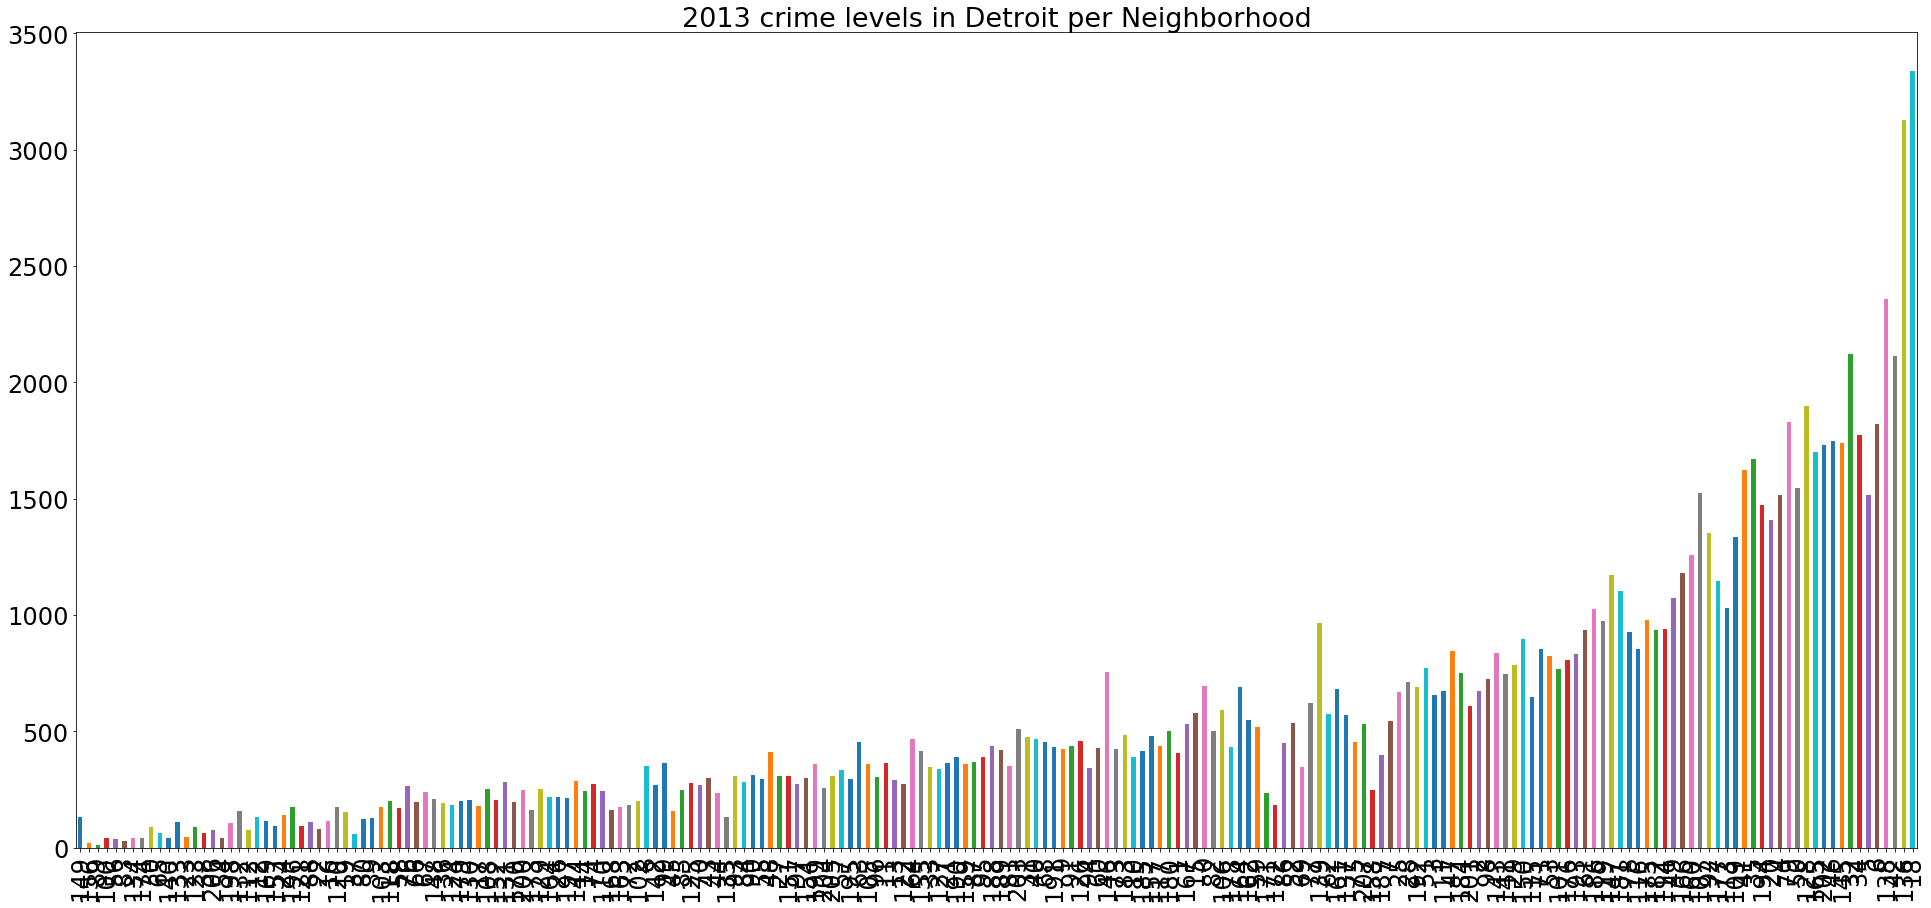

In [46]:
# sort 2017 
#dem = dem.sort_values(by='Price')
DetCrime = DetCrime.sort_values(by='Incidents17')

# plot 2017

plt.figure(figsize=(33,15))
plt.title('2017 crime levels in Detroit per Neighborhood',  fontsize=27)
DetCrime['Incidents17'].plot.bar(stacked=False, fontsize=24)
plt.show()

#sort 2013 

plt.figure(figsize=(33,15))
plt.title('2013 crime levels in Detroit per Neighborhood',  fontsize=27)
DetCrime['Incidents13'].plot.bar(stacked=False, fontsize=24)

plt.show()

In [47]:
#DetCrime

#group by Neighborhood name again, but this time count and not sum 
dem2 = demolitions.groupby(['Neighborhood']).count()

In [48]:
dem2.head()

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Location,Primary_Funding_Source,geometry
Neighborhood,,,,,,,,,,,
Airport Sub,218,218,218,218,218,218,218,218,218,218,218
Aviation Sub,4,4,4,4,4,4,4,4,4,4,4
Bagley,10,10,10,10,10,10,10,10,10,10,10
Barton-McFarland,192,192,192,192,192,192,192,192,192,192,192
Belmont,8,8,8,8,8,8,8,8,8,8,8


Basically each one of the columns reflects number of incidents since we applied a "count" 



In [49]:
#let's combine the Demolitions count to the crime data

DetCrime['NumDemolitions'] = dem2['Address']

In [50]:
DetCrime.head()

,Neighborhood,Incidents17,Incidents13,NumDemolitions
149,Belle Isle,6,132,NaN
156,Waterworks Park,14,18,NaN
89,Douglass,18,10,NaN
100,Virginia Park,25,41,NaN
56,Arden Park,27,37,NaN


In [51]:
dem2['NumDemolitions'] = dem2['Address']  

In [52]:
# merge crime and demolitions data 
DetDemCrimeMerge = pd.merge(DetCrime,  dem2 , on = 'Neighborhood', how = "inner")

In [66]:
DetDemCrimeMerge.head()

,Neighborhood,Incidents17,Incidents13,NumDemolitions_x,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Location,Primary_Funding_Source,geometry,NumDemolitions_y
0,West Virginia Park,28,28,NaN,2,2,2,2,2,2,2,2,2,2,2,2
1,Oakwood Heights,33,89,NaN,2,2,2,2,2,2,2,2,2,2,2,2
2,Carbon Works,41,63,NaN,13,13,13,13,13,13,13,13,13,13,13,13
3,Historic Atkinson,41,41,NaN,2,2,2,2,2,2,2,2,2,2,2,2
4,Medbury Park,41,111,NaN,2,2,2,2,2,2,2,2,2,2,2,2


In [54]:
a = {'Neighborhood': DetDemCrimeMerge['Neighborhood'] , 'Incidents17': DetDemCrimeMerge['Incidents17'], 'Incidents13': DetDemCrimeMerge['Incidents13'],'NumDemolitions': DetDemCrimeMerge['NumDemolitions_y']}
DetCrimeFinal = pd.DataFrame(data=a)

In [55]:
# DetCrimeFinal is the merged data for crime incicdents in 2013 / 2017 and the number of demolitions
DetCrimeFinal.tail(20)

,Neighborhood,Incidents17,Incidents13,NumDemolitions
153,Schulze,992,1337,13
154,Springwells,1027,1621,198
155,Bagley,1030,1669,10
156,Nolan,1040,1473,120
157,Warren Ave Community,1045,1408,185
158,Morningside,1102,1514,315
159,Central Southwest,1119,1829,160
160,Oakman Blvd Community,1120,1546,238
161,Midwest,1130,1899,240
162,Outer Drive-Hayes,1147,1700,395


In [56]:
# calcaulte crime precentage change between 2013 and 2017 

# (incindets 2017) minus (incidents 2013) divided by (incidents 2013)  multiplaid by 100
DetCrimeFinal['P_Change'] = ((DetCrimeFinal['Incidents17'] - DetCrimeFinal['Incidents13']) / (DetCrimeFinal['Incidents13'] )* 100)

In [57]:
DetCrimeFinal.tail()

,Neighborhood,Incidents17,Incidents13,NumDemolitions,P_Change
168,Cornerstone Village,1201,1516,108,-20.778364
169,Regent Park,1355,1820,344,-25.549451
170,Midtown,1383,2358,2,-41.348601
171,Franklin Park,1513,2111,174,-28.327807
172,Warrendale,2407,3337,653,-27.869344


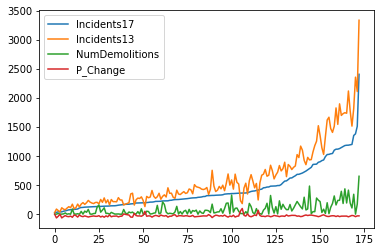

In [58]:
DetCrimeFinal.plot(by= 'P_Change')

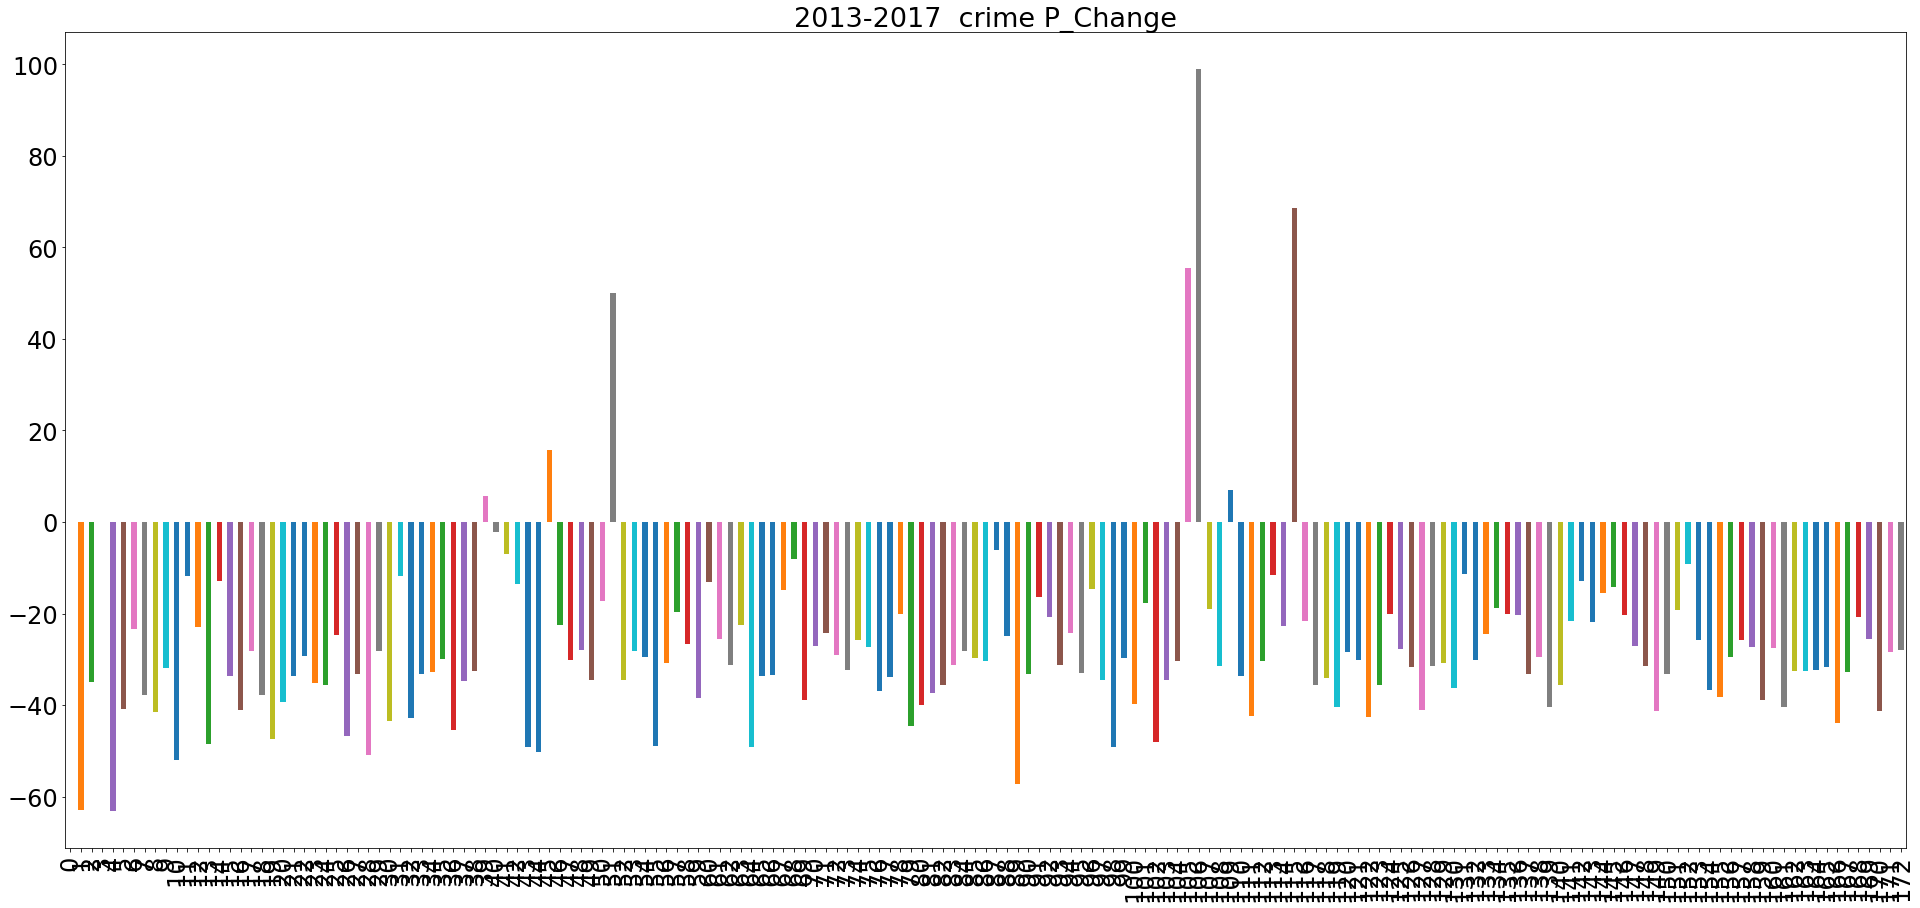

In [59]:
plt.figure(figsize=(33,15))
plt.title('2013-2017  crime P_Change',  fontsize=27)
DetCrimeFinal['P_Change'].plot.bar(stacked=False, fontsize=24)

In [60]:
#sort
DetCrimeFinal = DetCrimeFinal.sort_values(by='NumDemolitions')

In [61]:
DetCrimeFinal.tail(3)

,Neighborhood,Incidents17,Incidents13,NumDemolitions,P_Change
164,Brightmoor,1182,1747,437,-32.341156
144,Holcomb Community,789,935,485,-15.614973
172,Warrendale,2407,3337,653,-27.869344


In [62]:
# some descriptives about the % change
print ("Describe", DetCrimeFinal.P_Change.describe())

Describe count    173.000000
mean     -27.438609
std       19.421719
min      -63.063063
25%      -35.662432
50%      -30.434783
75%      -22.489960
max       98.907104
Name: P_Change, dtype: float64


In [63]:
DetCrimeFinal[DetCrimeFinal["P_Change"] >  -27.438609]

,Neighborhood,Incidents17,Incidents13,NumDemolitions,P_Change
14,Hubbard Richard,109,125,1,-12.800000
51,Milwaukee Junction,198,132,1,50.000000
31,McNichols Evergreen,143,162,1,-11.728395
107,Lafayette Park,365,451,1,-19.068736
0,West Virginia Park,28,28,2,0.000000
12,Minock Park,87,113,2,-23.008850
3,Historic Atkinson,41,41,2,0.000000
46,Forest Park,193,249,3,-22.489960
70,Aviation Sub,254,348,4,-27.011494
113,Mohican Regent,401,454,5,-11.674009


### b. Real Estate

## 6. Conclusions / Discussion  

## 7. Survey 


#### Thank you for participating in our workshop! It would be very helpful for us if you could take a few minutes to fill out a survey to provide feedback about your experience. 

Q1. Did you had any previous data analytics / visualizations experience? 

< your answer>

Q2. Are you from Detroit or very familiar with the city?  

< your answer>

Q3. What is the most interesting thing you learned throughout the workshop ? 

< your answer>

Q4. Why were you drawn to this Open Demolitions workshop in the first place?  

< your answer>

Q5. Did the workshop fulfil your what you hoped to achieve?   

< your answer>

Q6. If you could add one more section to the workshop, what would that be? 

< your answer>

### Thank You! 